<a href="https://colab.research.google.com/github/mig2002/APR_ASSIGNMENT1_LOR/blob/main/APR_ASSIGNMENT_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a logistic regression model using the data in "data.csv". Include data preprocessing, model training, model evaluation (accuracy), and data visualization.

## Load the data

### Subtask:
Load the dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the dataset from the provided CSV file into a pandas DataFrame.



In [14]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

## Data preprocessing

### Subtask:
Drop irrelevant columns, convert categorical features into numerical representations using one-hot encoding, scale the numerical features, define the target variable, and split the data into training and testing sets.


**Reasoning**:
Drop irrelevant columns, create the binary target variable, separate features and target, select numerical features, scale the numerical features using ColumnTransformer and StandardScaler, and split the data into training and testing sets.



In [15]:
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
median_price = df['price'].median()
df['price_binary'] = (df['price'] > median_price).astype(int)
df = df.drop('price', axis=1)

X = df.drop('price_binary', axis=1)
y = df['price_binary']

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns=numerical_features.tolist()) # Convert back to DataFrame

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3680, 12)
X_test shape: (920, 12)
y_train shape: (3680,)
y_test shape: (920,)


## Model training

### Subtask:
Train a logistic regression model using the preprocessed training data.


**Reasoning**:
Train a logistic regression model using the preprocessed training data.



In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the test set using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained model by making predictions on the test set and calculating accuracy, precision, recall, and F1-score.



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7609
Precision: 0.7614
Recall: 0.7444
F1-score: 0.7528


## Data visualization

### Subtask:
Visualize the data to gain insights into the relationships between features and the target variable.


**Reasoning**:
Create a box plot to visualize the relationship between 'floors' and 'price_binary' using the original dataframe `df`.



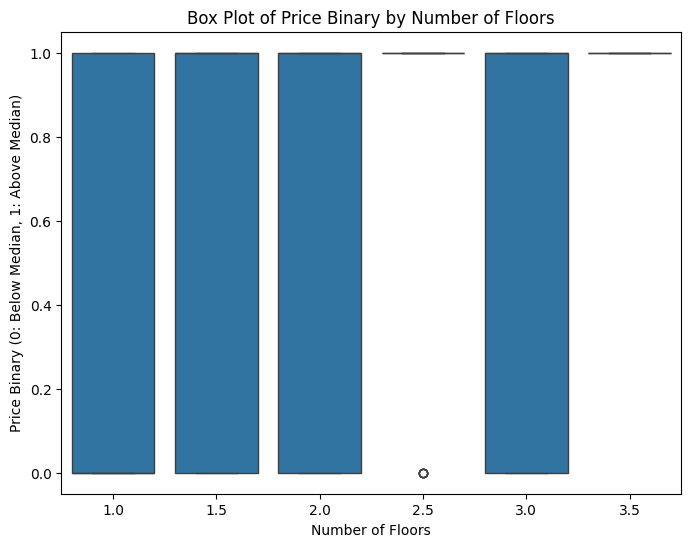

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='floors', y='price_binary', data=df)
plt.xlabel("Number of Floors")
plt.ylabel("Price Binary (0: Below Median, 1: Above Median)")
plt.title("Box Plot of Price Binary by Number of Floors")
plt.show()

## Summary:

### Data Analysis Key Findings

*   Irrelevant columns such as 'date', 'street', 'city', 'statezip', and 'country' were removed from the dataset.
*   A binary target variable 'price\_binary' was created, where 1 indicates a price above the median and 0 indicates a price below the median.
*   Numerical features were scaled using `StandardScaler`.
*   The data was split into training (80%) and testing (20%) sets.
*   A logistic regression model was trained on the training data.
*   The trained model achieved an accuracy of approximately 76.09%, a precision of 76.14%, a recall of 74.44%, and an F1-score of 75.28% on the test set.
*   A box plot visualizing the relationship between the number of floors and the binary price indicated potential differences in the distribution of prices based on the number of floors.

### Insights or Next Steps

*   The model's performance is moderate. Further feature engineering, exploring different models, or hyperparameter tuning could potentially improve the accuracy.
*   Investigate the relationship between 'floors' and 'price\_binary' further to understand if the number of floors is a significant predictor of price and consider including more detailed visualizations or statistical tests.
